# Imports

In [1]:
import sys, datetime
from qick.asm_v2 import QickSweep1D

sys.path.append("../Libraries") # replace this with your location of the Libraries folder
from resonator_spectroscopy import *

No module named 'visa'
Warning VISA library import failed
Warning serial library import failed.
Could not load Autonics TM4 Driver


# Run experiment

  0%|          | 0/40000 [00:00<?, ?it/s]

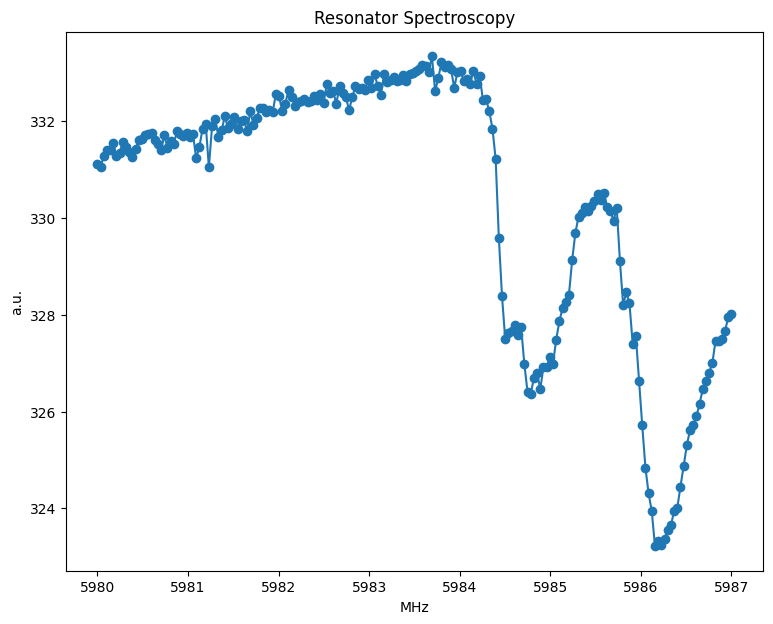

Creating directory G:\My Drive\chatot\data\resonator_spectroscopy\2024_12_19\00;51;45\
Data saved to G:\My Drive\chatot\data\resonator_spectroscopy\2024_12_19\00;51;45\data.h5
Config saved to G:\My Drive\chatot\data\resonator_spectroscopy\2024_12_19\00;51;45\cfg.json


In [2]:
date = str(datetime.datetime.now().strftime('%Y_%m_%d'))
time = str(datetime.datetime.now().strftime('%H;%M;%S'))

datapath = f'G:\\My Drive\\chatot\\data\\resonator_spectroscopy\\{date}\\{time}\\' # replace this with your data location

config_file = f"..\\..\\..\\..\\cfg\\llosta.json" # replace this with your config

meas = resonator_spectroscopy(path=datapath, config_file=config_file)

center = 5983.5
span = 3.5
steps = 200

meas.cfg.expt = {
    "n_avg": 200,
    "ro_len": 100,
    "pulse_len": 100, # why does this need to be separate from ro_len
    "phase": 0,
    "gain": 0.3,
    "trig_offset": 0.5,
    "freq": QickSweep1D('freq_loop', center - span, center + span),
    "steps": steps,
    "center": center,
    "span": span
}

meas.acquire()
meas.display(save=True)
meas.savedata()

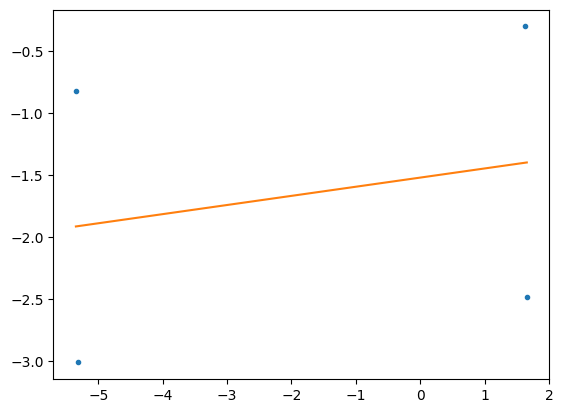

Traceback (most recent call last):
  File "C:\Users\csnipp\Documents\charles_qick\Lib\site-packages\IPython\core\interactiveshell.py", line 3577, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\csnipp\AppData\Local\Temp\2\ipykernel_4648\2844533959.py", line 1, in <module>
    meas.fit(plot=True)
  File "C:\Users\csnipp\Documents\charles_qick\Experiments\../Libraries\resonator_spectroscopy.py", line 112, in fit
    fit_params = roughfit(fs, S, f0_guess, plot=plot)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\csnipp\Documents\charles_qick\Experiments\../Utilities\resonance_fitting.py", line 202, in roughfit
    f0_est, Qr_est, id_f0, id_BW = estpara(f,z1,fr_0)
                                   ^^^^^^^^^^^^^^^^^^
  File "C:\Users\csnipp\Documents\charles_qick\Experiments\../Utilities\resonance_fitting.py", line 47, in estpara
    id_BW_left = left_trim + np.argmin(abs(abs(z[left_trim:id_f0]-z[id_f0])-abs(z[left_trim:id_f0]-np.m

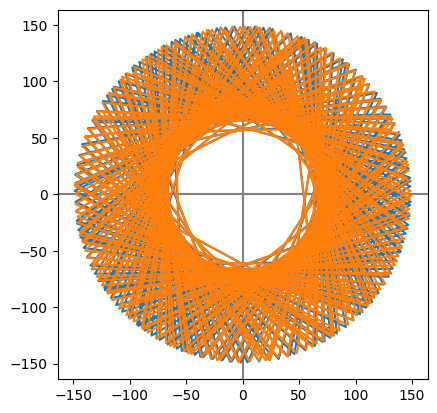

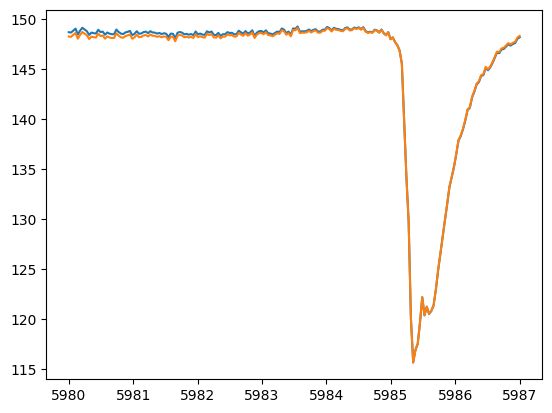

In [5]:
meas.fit(plot=True)